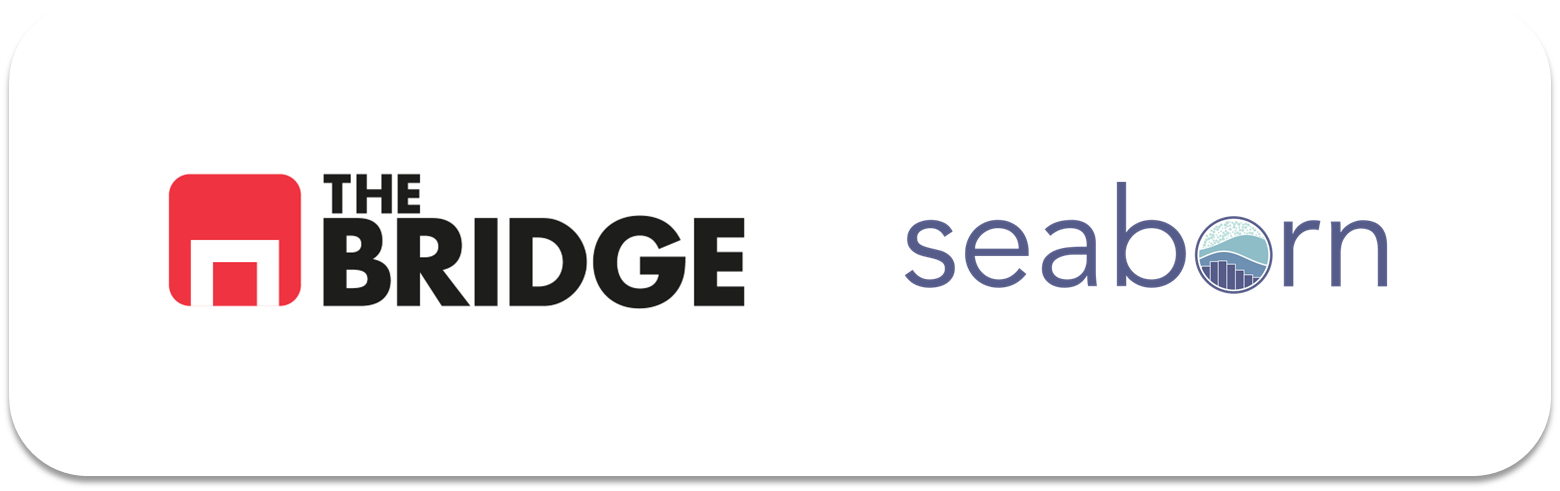

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Importación de bibliotecas esenciales y csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [2]:
df_titanic= pd.read_csv("./data/titanic.csv")
df_titanicbu=df_titanic

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Preparación del dataset depurando columnas no útiles en el estudio, transformando nulos y añadiendo columna "Died" para trabajar desde la perspectiva de fallecimientos.

In [5]:
# Eliminamos columna parch, deck y pclass
#df_titanic= df_titanic.drop('parch',axis=1) 
#df_titanic = df_titanic.drop(['deck','pclass'],axis=1)

# Preparamos la media por edad y género
df_titanic.groupby('who')['age'].mean()
df_titanic['age_by_group']=df_titanic.groupby('who')['age'].transform('mean')
df_titanic.loc[df_titanic['age'].isna(),'age']=df_titanic.loc[df_titanic['age'].isna(),'age_by_group']

df_titanic['age_by_group']=df_titanic.groupby('who')['age'].transform('mean')
df_titanic.loc[df_titanic['age'].isna(),'age']=df_titanic.loc[df_titanic['age'].isna(),'age_by_group']
df_titanic.loc[df_titanic['embark_town'].isna(),'embark_town']=df_titanic['embark_town'].mode().iloc[0]
df_titanic.loc[df_titanic['embarked'].isna(),'embarked']=df_titanic['embarked'].mode().iloc[0]

#Crear died
df_titanic['died'] = df_titanic['survived'].apply(lambda x: "yes" if x == 0 else "no")

#Pasar a castellano los items de who con un diccionario
trad_who = {"man": "hombre", "woman": "mujer", "child": "niño"}
df_titanic["who"] = df_titanic["who"].map(trad_who)

df_titanic.info()

#Dejamos age by group por si lo necesitamos
#df_titanic.drop(["age_by_group"], axis = 1, inplace = True)

df_titanic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   sex           891 non-null    object 
 3   age           891 non-null    float64
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embarked      891 non-null    object 
 8   class         891 non-null    object 
 9   who           891 non-null    object 
 10  adult_male    891 non-null    bool   
 11  deck          203 non-null    object 
 12  embark_town   891 non-null    object 
 13  alive         891 non-null    object 
 14  alone         891 non-null    bool   
 15  age_by_group  891 non-null    float64
 16  died          891 non-null    object 
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 106.3+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_by_group,died
0,0,3,male,22.0,1,0,7.2500,S,Third,hombre,True,NaN,Southampton,no,False,33.173123,yes
1,1,1,female,38.0,1,0,71.2833,C,First,mujer,False,C,Cherbourg,yes,False,32.000000,no
2,1,3,female,26.0,0,0,7.9250,S,Third,mujer,False,NaN,Southampton,yes,True,32.000000,no


### Premisa 1

La fatalidad del Titanic tuvo consecuencias mortales importantes: 3 de cada 5 viajeros no llegaron a destino.

Por ello, se contabilizan pasajeros y fallecidos.

In [6]:
# Obtener el número total de pasajeros
pasajeros = df_titanic["who"].count()
print(pasajeros)
print(f"La cifra de pasajeros fue de {pasajeros}")

# Contar el número de pasajeros fallecidos
fallecidos = df_titanic[df_titanic["died"] == "yes"]["who"].count()
print(f"La cifra de fallecidos fue de {fallecidos}")

# División fllecidos/pasajeros
cifra= fallecidos/pasajeros
print(f"Cifra fallecidos {cifra}, 3 de cada 5 personas fallecieron")

891
La cifra de pasajeros fue de 891
La cifra de fallecidos fue de 549
Cifra fallecidos 0.6161616161616161, 3 de cada 5 personas fallecieron


Se realizan gráficos sobre tasas de fallecimiento

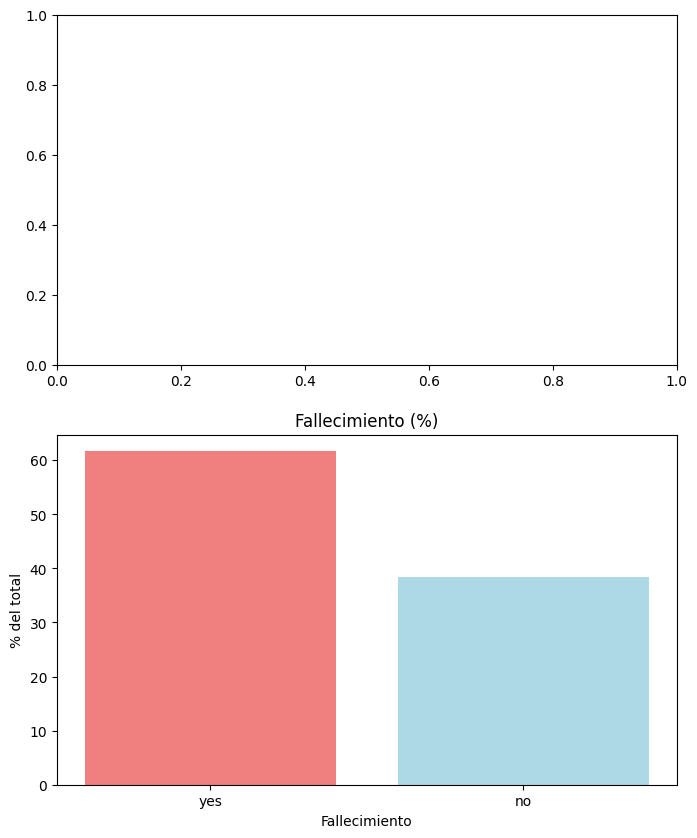

In [7]:
categorias = df_titanic["died"].value_counts().index.tolist()
frecuencias = df_titanic["died"].value_counts().tolist()
frec_relativas = (df_titanic["died"].value_counts(normalize=True) * 100).tolist()

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.subplots_adjust(wspace=5.5)
''' Dejamos en comentado las frecuencias absolutas para simplificar la presentación
ax[0].bar(categorias, frecuencias, color=["lightcoral", "lightblue"]) 
ax[0].set_title("Fallecimiento (Frecuencias Absolutas)")
ax[0].set_xlabel("Fallecimiento")
ax[0].set_ylabel("Num. personas")
'''
ax[1].bar(categorias, frec_relativas, color=["lightcoral", "lightblue"])  
ax[1].set_title("Fallecimiento (%)")
ax[1].set_xlabel("Fallecimiento")
ax[1].set_ylabel("% del total")

plt.savefig('data/frecuencias_fallecimiento1.png')  
plt.show()



### Premisa 2

¡Mujeres y niños primero! La mortalidad fue mayor en hombres.  

¿Quién viajaba en el Titanic? Principalmente hombres.

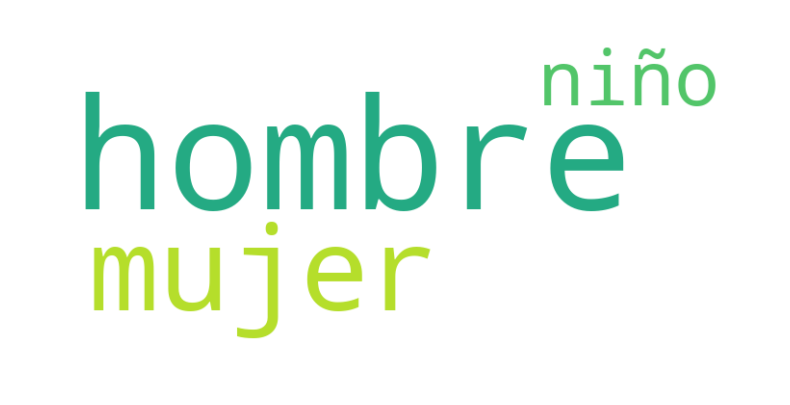

In [106]:

text = ' '.join(df_titanic['who'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('data/nubeviajeros2.png')  
plt.show()

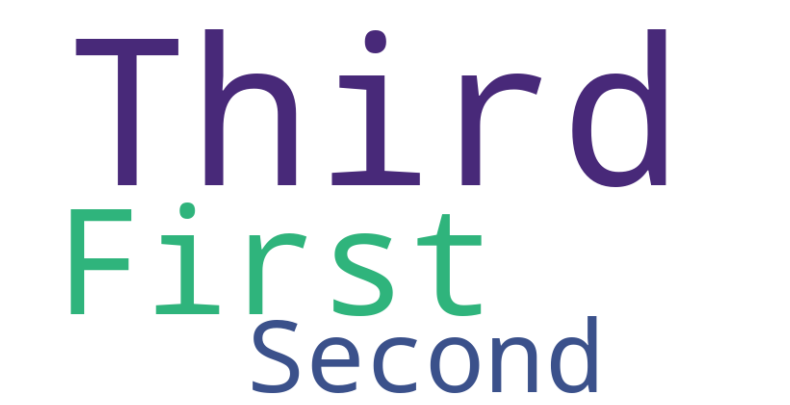

In [199]:
text = ' '.join(df_titanic['class'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('data/nubeviajeros2clase.png')  
plt.show()

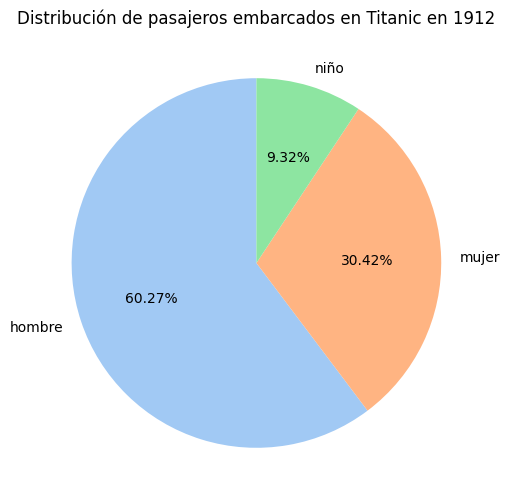

In [105]:
colors_pastel = sns.color_palette("pastel")

pasajeros_por_who = df_titanic["who"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de pasajeros embarcados en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajeros2.png')  
plt.show()



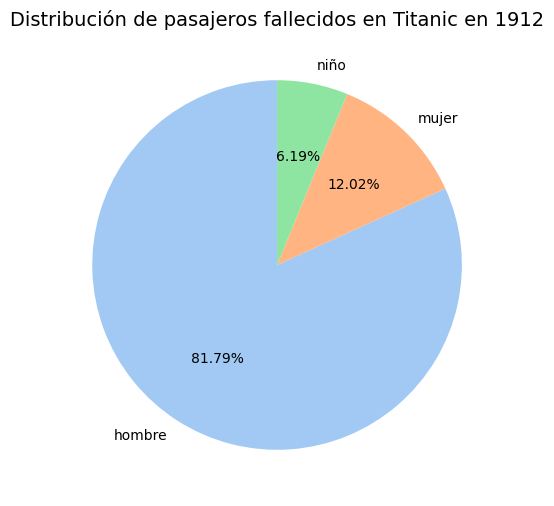

In [107]:
colors_pastel = sns.color_palette("pastel")

dat_died_who = df_titanic[df_titanic["died"] == "yes"]["who"].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pie(dat_died_who.values,
       labels=dat_died_who.index,
       autopct='%.2f%%', startangle=90,
       colors=colors_pastel)  # Usamos una paleta de colores pastel

ax.set_title("Distribución de pasajeros fallecidos en Titanic en 1912", fontsize=14)
#ax.legend(loc="upper right", title="Viajero")

plt.savefig('data/fallecidos2.png')  
plt.show()



Como apoyo, se calculan y dibujan frecuencias relativas y su tabla de contingencia

In [147]:
def dibujar_frec_fig_tabla(df, col, col2="died"):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.countplot(data=df, x=col, hue=col2, palette=["lightcoral", "lightblue"])
    ax.set_title(f"Pasajeros fallecidos y supervivientes (%)")
    ax.set_xlabel(col)  
    
    total_col = df[col].count()
    total_survived = df[df[col2] == 'no'][col].count()
    total_died = df[df[col2] == 'yes'][col].count()

    for p in ax.patches:
        if col2 == 'died':
            if p.get_height() == total_died:
                height = 100
            else:
                height = (p.get_height() / total_col) * 100
        elif col2 == 'pasajero':
            if p.get_height() == total_col:
                height = 100
            elif p.get_height() == total_survived:
                height = (p.get_height() / total_survived) * 100
            elif p.get_height() == total_died:
                height = (p.get_height() / total_died) * 100
                
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    ax.set_ylabel("%")
    
    plt.tight_layout()
    plt.show()

    tabla_contingencia = pd.crosstab(df[col], df[col2], margins=False, normalize='index') * 100
    return tabla_contingencia




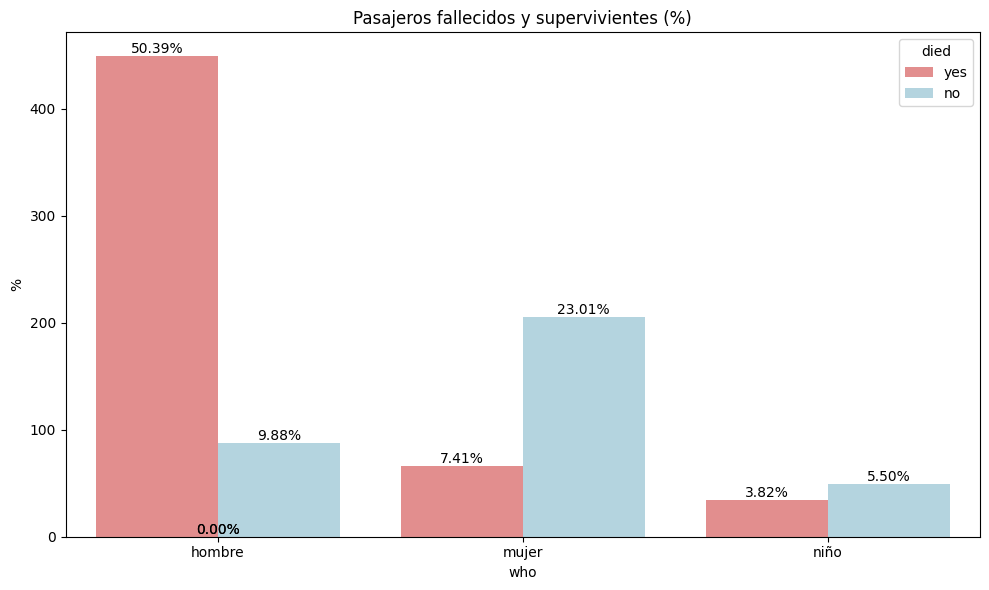

<Figure size 640x480 with 0 Axes>

In [148]:
dibujar_frec_fig_tabla(df_titanic, "who")
plt.savefig('data/fallecimientoporgenero2.jpg')  

plt.show()


### Premisa 3
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  


In [149]:
def dibujar_frec_fig_tabla1(df, col, col2="died"):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.countplot(data=df, x=col, hue=col2, palette=["lightcoral", "lightblue"])
    ax.set_title(f"Pasajeros fallecidos y supervivientes clase (%)")
    ax.set_xlabel(col)  
    
    total_col = df[col].count()
    total_survived = df[df[col2] == 'no'][col].count()
    total_died = df[df[col2] == 'yes'][col].count()

    for p in ax.patches:
        if col2 == 'died':
            if p.get_height() == total_died:
                height = 100
            else:
                height = (p.get_height() / total_col) * 100
        elif col2 == 'pasajero':
            if p.get_height() == total_col:
                height = 100
            elif p.get_height() == total_survived:
                height = (p.get_height() / total_survived) * 100
            elif p.get_height() == total_died:
                height = (p.get_height() / total_died) * 100
                
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    ax.set_ylabel("%")
    
    plt.tight_layout()
    plt.show()

    tabla_contingencia = pd.crosstab(df[col], df[col2], margins=False, normalize='index') * 100
    return tabla_contingencia

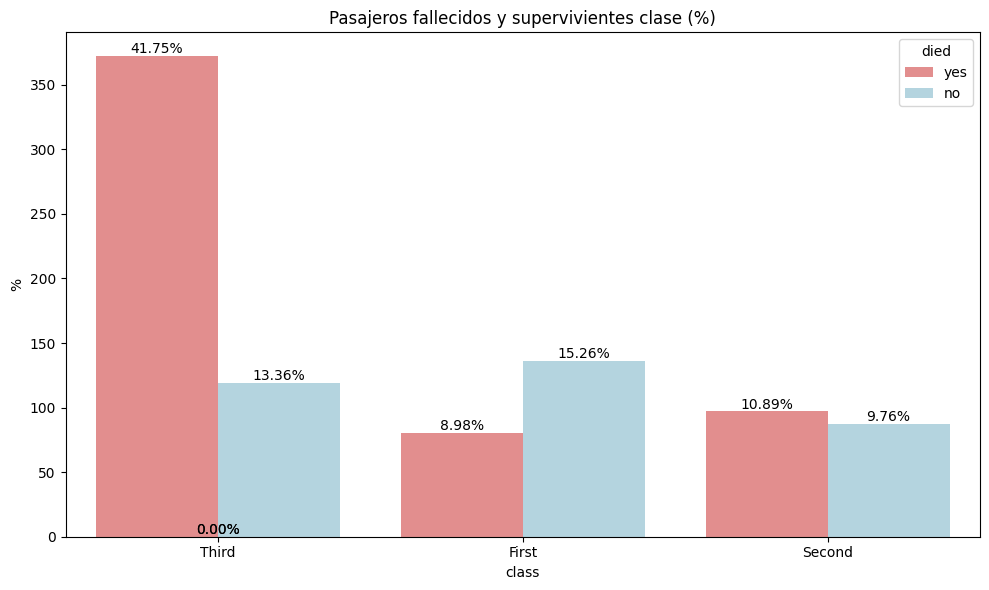

<Figure size 640x480 with 0 Axes>

In [151]:
dibujar_frec_fig_tabla1(df_titanic, "class","died")
plt.savefig('data/fallecimientoporclase3.png')  
plt.show()

In [152]:
def dibujar_frec_fig_tablasimple(df, col1, col2):
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    sns.countplot(data=df, x=col1, hue=col2, palette=["lightcoral", "lightblue"])
    ax.set_title(f"Distribución de pasajeros fallecidos y supervivientes por clase")
    ax.set_xlabel("clase")
    ax.set_ylabel("Personas")
    
    total_col = df[col1].count()
    for p in ax.patches:
        height = (p.get_height() / total_col) * 100
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.legend(title=col2)
    plt.show()

    tabla_contingencia = pd.crosstab(df[col1], df[col2], margins=False)
    return tabla_contingencia


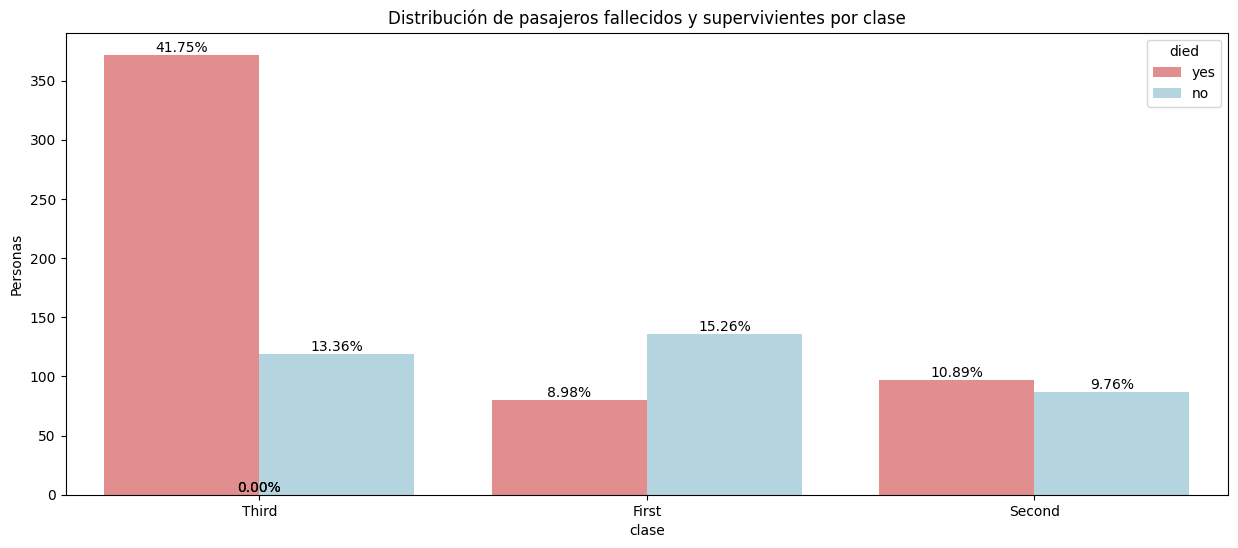

<Figure size 640x480 with 0 Axes>

In [153]:
dibujar_frec_fig_tablasimple(df_titanic, "class","died")
plt.savefig('data/fallecimientoporclasesimple3.png')  
plt.show()

Indicamos el porcentaje de viajeros por clase en mujer, niño y hombre

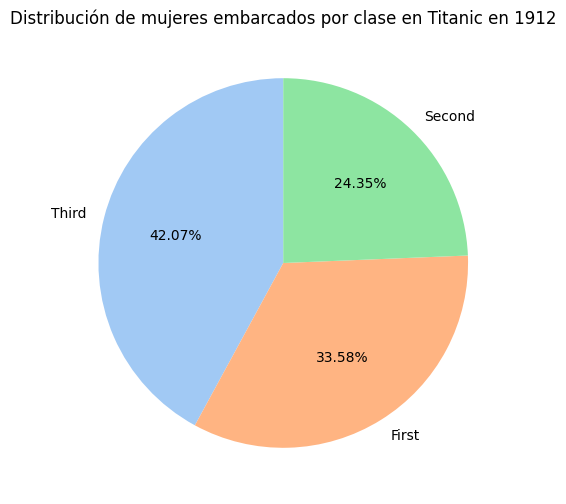

In [168]:
colors_pastel = sns.color_palette("pastel")


pasajeros_por_who = df_titanic.loc[df_titanic["who"] == "mujer", "class"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de mujeres embarcados por clase en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajerosclase3mujer.png')  
plt.show()


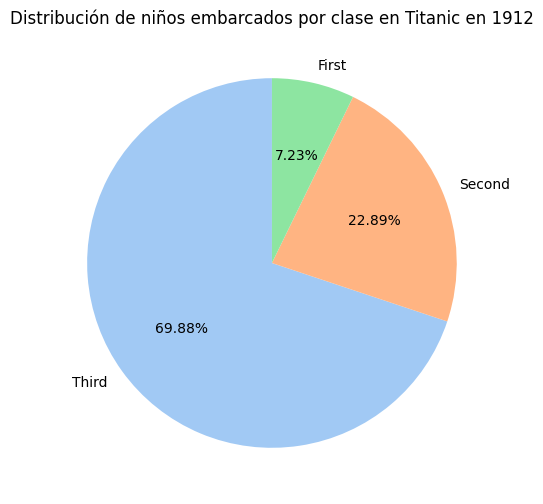

In [161]:
colors_pastel = sns.color_palette("pastel")


pasajeros_por_who = df_titanic.loc[df_titanic["who"] == "niño", "class"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de niños embarcados por clase en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajerosclase3niño.png')  
plt.show()


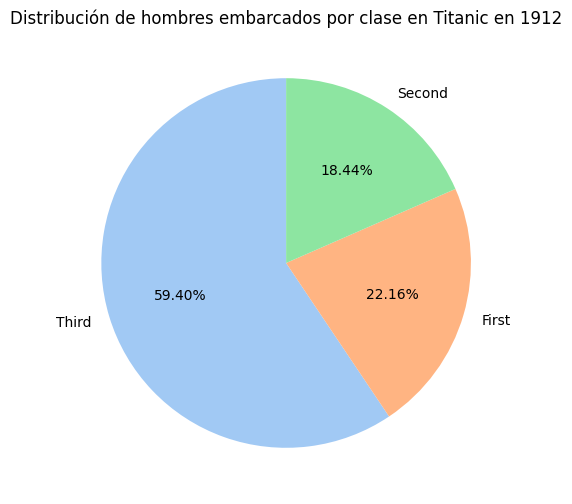

In [162]:
colors_pastel = sns.color_palette("pastel")


pasajeros_por_who = df_titanic.loc[df_titanic["who"] == "hombre", "class"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de hombres embarcados por clase en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajerosclase3hombres.png')  
plt.show()

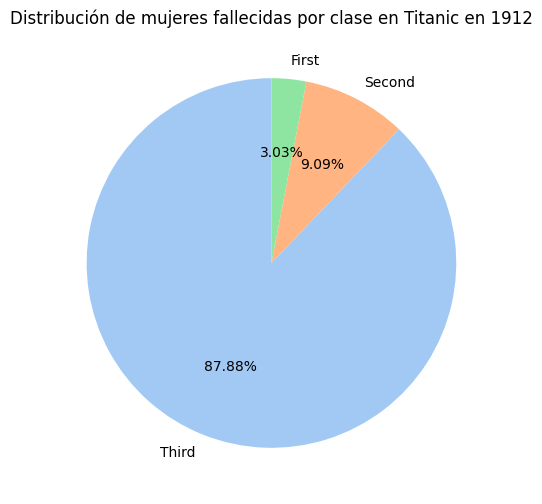

In [164]:


colors_pastel = sns.color_palette("pastel")
pasajeros_por_who = df_titanic.loc[(df_titanic["who"] == "mujer") & (df_titanic["died"] == "yes"), "class"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de mujeres fallecidas por clase en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajerosclase3mujerfallecida.png')  
plt.show()


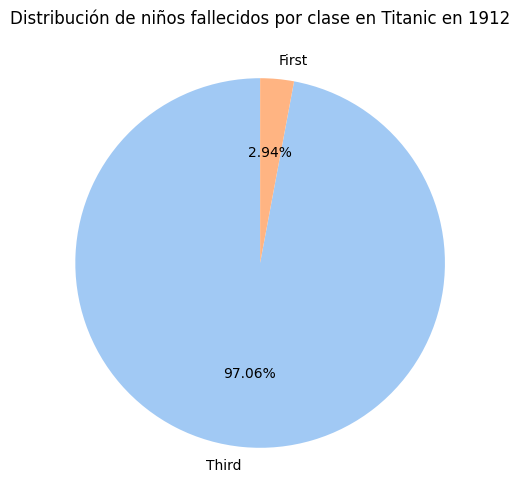

In [166]:

colors_pastel = sns.color_palette("pastel")
pasajeros_por_who = df_titanic.loc[(df_titanic["who"] == "niño") & (df_titanic["died"] == "yes"), "class"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de niños fallecidos por clase en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajerosclase3niñofallecida.png')  
plt.show()

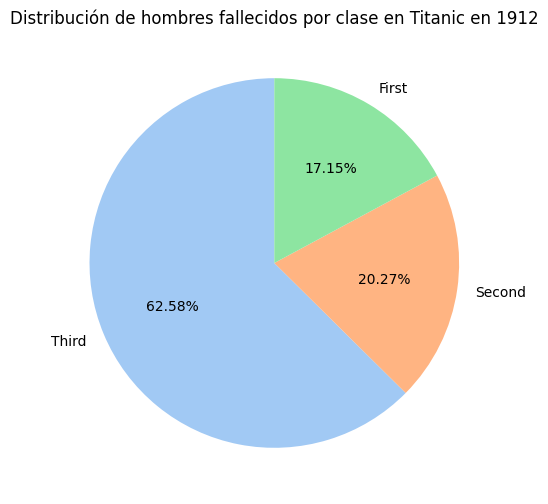

In [167]:
colors_pastel = sns.color_palette("pastel")
pasajeros_por_who = df_titanic.loc[(df_titanic["who"] == "hombre") & (df_titanic["died"] == "yes"), "class"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pasajeros_por_who, labels=pasajeros_por_who.index, autopct='%.2f%%', startangle=90, colors=colors_pastel)

plt.title("Distribución de hombres fallecidos por clase en Titanic en 1912")
#ax.legend(loc="upper right", title="Viajero")


plt.savefig('data/viajerosclase3hombrefallecida.png')  
plt.show()

Indicamos el porcentaje de viajeros fallecidos por clase

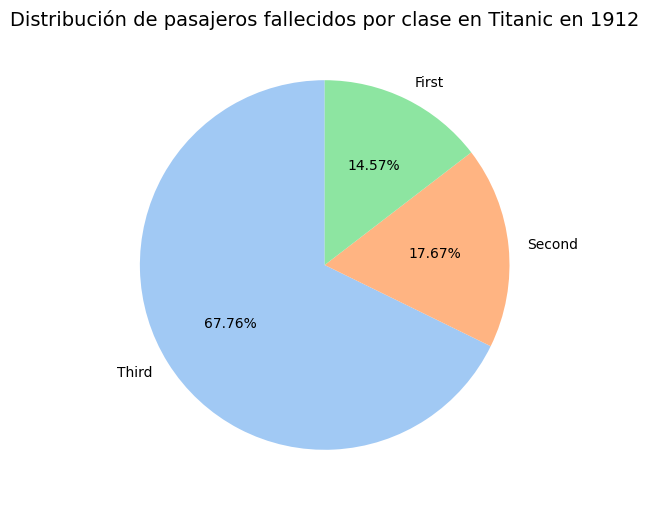

In [112]:
colors_pastel = sns.color_palette("pastel")

dat_died_who = df_titanic[df_titanic["died"] == "yes"]["class"].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pie(dat_died_who.values,
       labels=dat_died_who.index,
       autopct='%.2f%%', startangle=90,
       colors=colors_pastel)  # Usamos una paleta de colores pastel

ax.set_title("Distribución de pasajeros fallecidos por clase en Titanic en 1912", fontsize=14)
#ax.legend(loc="upper right", title="Viajero")

plt.savefig('data/fallecidos3.png')  
plt.show()

Funciones más complejas para analizar no presentadas

In [ ]:
def pintarfrecabsoluta(df, cols_categorica):
    num_columns = len(cols_categorica)
    num_rows = (num_columns + 1) // 2
    
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))
    fig.subplots_adjust(hspace=0.2)
    
    for i, column in enumerate(cols_categorica):
        row = i // 2
        col = i % 2
        
        sns.countplot(x=column, data=df, ax=axs[row, col])
        axs[row, col].set_title(f"Frecuencias Absolutas de {column}")
    
    if num_columns % 2 != 0: #añadido después por tener 3 gráficos en ej3.
        fig.delaxes(axs[row, col+1])    
    
    plt.show()


In [180]:
def dibujar_frec_fig_tabla(df, col1, col2):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.countplot(data=df, x=col1, ax=axs[0], hue="died", palette=["lightcoral", "ligthblue"])
    axs[0].set_title(f"Frecuencias Relativas de {col1}")
    axs[0].set_xlabel(col1)  
    total_col1 = df[col1].count()
    for p in axs[0].patches:
        height = p.get_height() / total_col1 * 100
        axs[0].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')

    sns.countplot(data=df, x=col2, ax=axs[1], hue="died", palette=["lightcoral", "lightblue"])
    axs[1].set_title(f"Frecuencias Relativas de {col2}")
    axs[1].set_xlabel(col2) 
    total_col2 = df[col2].count()
    for p in axs[1].patches:
        height = p.get_height() / total_col2 * 100
        axs[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    
    
    sns.catplot(x=col1,
                col=col2,
                kind="count",
                edgecolor=".6",
                orient="v",
                hue="died",
                palette=["green", "red"],
                legend=True,
                data=df)
    
    plt.show()

    tabla_contingencia = pd.crosstab(df[col1], df[col2], margins=False)
    return tabla_contingencia


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_5100\3526315395.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=col1, hue=col2, palette=["lightcoral", "lightblue","yellow"])


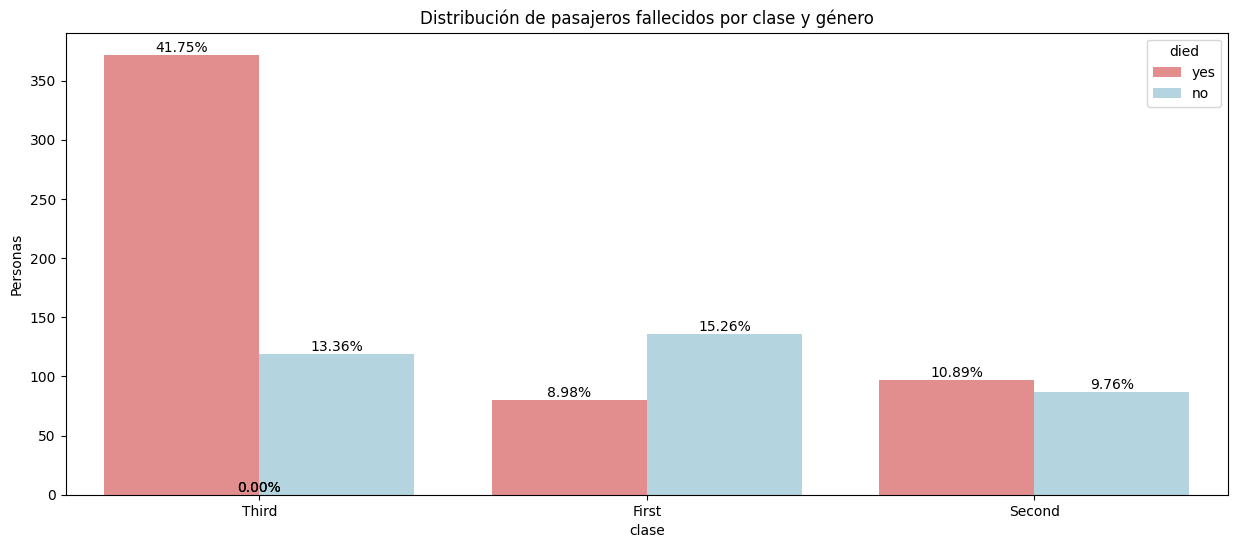

<Figure size 640x480 with 0 Axes>

In [182]:
dibujar_frec_fig_tablasimple(df_titanic,"class","died")
plt.savefig('data/fallecidos3clasefallecimeinto.png')  
plt.show()

### Premisa 4 
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    


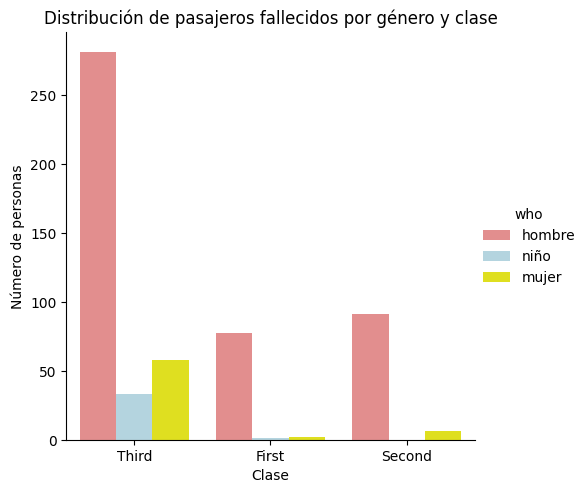

In [26]:
sns.catplot(x="class", col="died", hue="who", data=df_fallecidos, kind="count", palette=["lightcoral", "lightblue", "yellow"])

plt.title("Distribución de pasajeros fallecidos por género y clase")
plt.xlabel("Clase")
plt.ylabel("Número de personas")

plt.savefig('data/fallecidos5generonuevo.png')  
plt.show()


Función más compleja para analizar pero no presentada

In [177]:
def dibujar_frec_fig_tablasimple(df, col1, col2):
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    sns.countplot(data=df, x=col1, hue=col2, palette=["lightcoral", "lightblue","yellow"])
    ax.set_title(f"Distribución de pasajeros fallecidos por clase y género")
    ax.set_xlabel("clase")
    ax.set_ylabel("Personas")
    
    total_col = df[col1].count()
    for p in ax.patches:
        height = (p.get_height() / total_col) * 100
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.legend(title=col2)
    plt.show()

    tabla_contingencia = pd.crosstab(df[col1], df[col2], margins=False)
    return tabla_contingencia


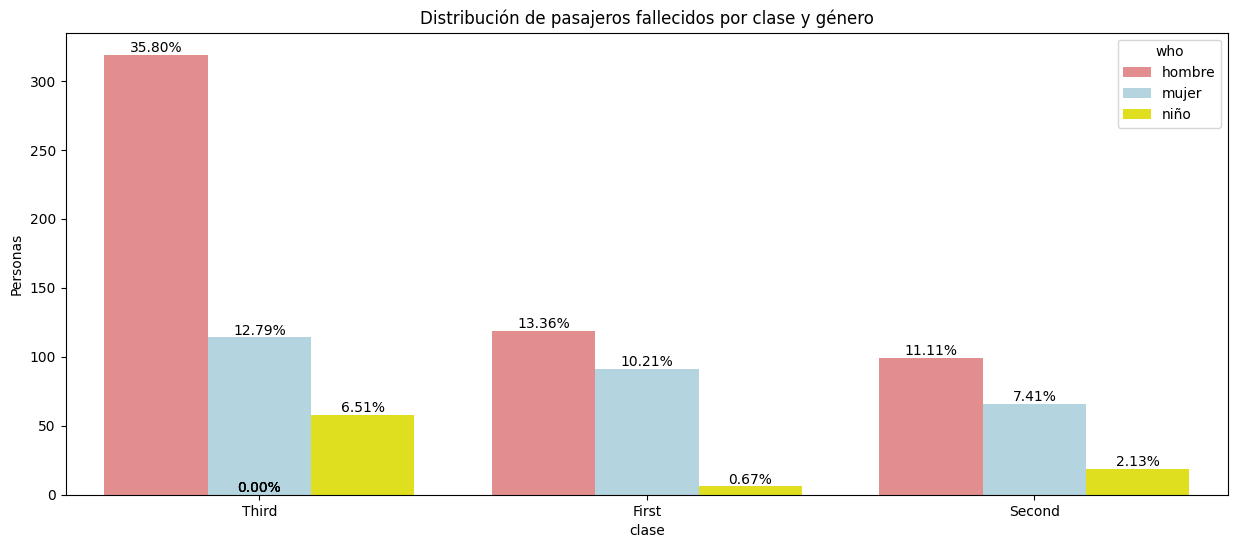

<Figure size 640x480 with 0 Axes>

In [179]:
df_fallecidos = df_titanic[df_titanic["died"] == "yes"]
dibujar_frec_fig_tablasimple(df_titanic,"class","who")
plt.savefig('data/fallecidos4clasegenero.png')  
plt.show()


### Premisa 5
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

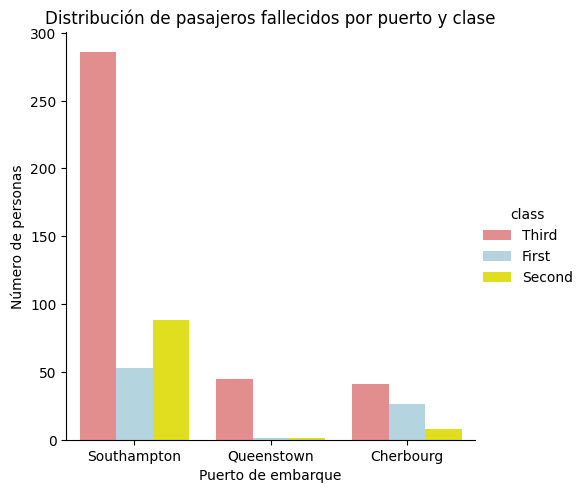

In [ ]:


sns.catplot(x="embark_town", col="died", hue="class", data=df_fallecidos, kind="count", palette=["lightcoral", "lightblue", "yellow"])

plt.title("Distribución de pasajeros fallecidos por puerto y clase")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de personas")

plt.savefig('data/fallecidos5puertonuevo.png')  
plt.show()


Función más compleja para analizar pero no presentada

In [13]:
def dibujar_frec_fig_tablasimple(df, col1, col2):
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    sns.countplot(data=df, x=col1, hue=col2, palette=["lightcoral", "lightblue","yellow"])
    ax.set_title(f"Distribución de pasajeros fallecidos por puerto y clase")
    ax.set_xlabel("clase")
    ax.set_ylabel("Personas")
    
    total_col = df[col1].count()
    for p in ax.patches:
        height = (p.get_height() / total_col) * 100
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.legend(title=col2)
    plt.show()

    tabla_contingencia = pd.crosstab(df[col1], df[col2], margins=False)
    return tabla_contingencia

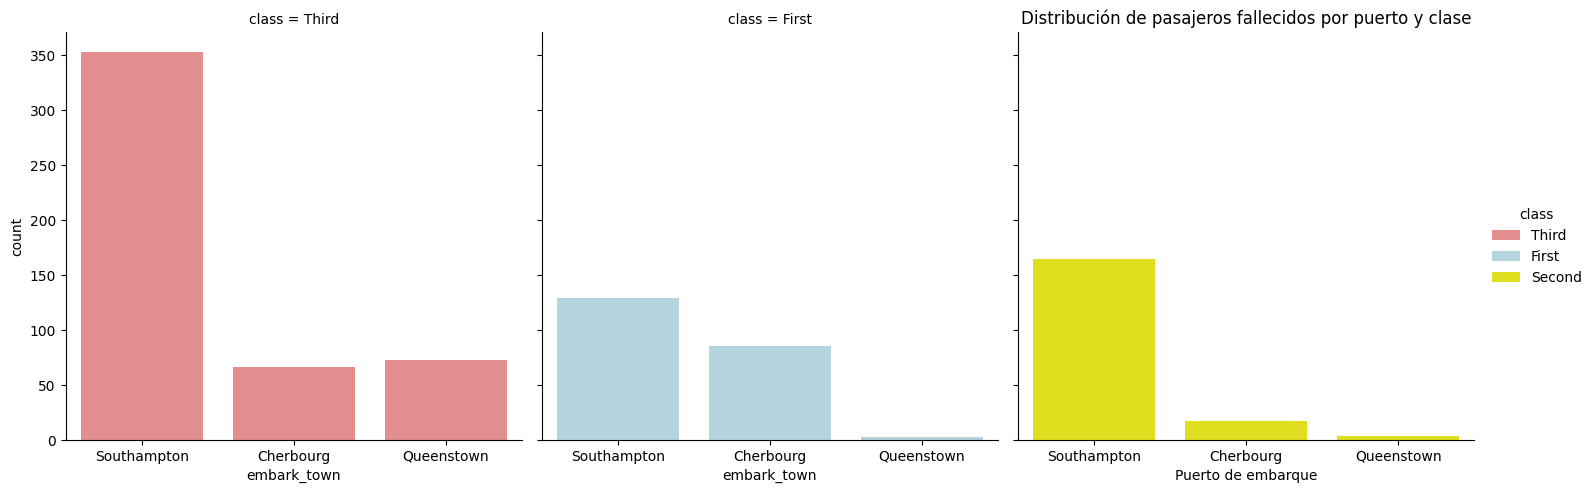

In [21]:


sns.catplot(x="embark_town", col="class", hue="class", data=df_titanic, kind="count", palette=["lightcoral", "lightblue", "yellow"])

plt.title("Distribución de pasajeros fallecidos por puerto y clase")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de personas")

plt.savefig('data/fallecidos5puertonuevo.png')  
plt.show()